<a href="https://colab.research.google.com/github/harperkole/HeartAttackPrediction/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df1 = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df1.head()


Saving heart.csv to heart.csv


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# make x and y data frames
# encode categorical feautures (cp and rest ecg) as one hot vectors

df_Y = df1[['output']].copy()

df_X = pd.DataFrame(columns=['age','sex','cp_typical_ang', 'cp_atypical_ang','cp_non_ang','cp_asympt',
                             'trtbps','chol','fbs','restecg_norm','restecg_wave_abnorm','restecg_lv_hypertr','thalachh',
                             'exng','oldpeak','slp','caa','thall'])

df_X[df_X.columns[0]] = df1[df1.columns[0]]
df_X[df_X.columns[1]] = df1[df1.columns[1]]
df_X[df_X.columns[6]] = df1[df1.columns[3]]
df_X[df_X.columns[7]] = df1[df1.columns[4]]
df_X[df_X.columns[8]] = df1[df1.columns[5]]
df_X[df_X.columns[12]] = df1[df1.columns[7]]
df_X[df_X.columns[13]] = df1[df1.columns[8]]
df_X[df_X.columns[14]] = df1[df1.columns[9]]
df_X[df_X.columns[15]] = df1[df1.columns[10]]
df_X[df_X.columns[16]] = df1[df1.columns[11]]
df_X[df_X.columns[17]] = df1[df1.columns[12]]


for i in range(df_X.shape[0]):
  cp_val = df1.loc[i,'cp']
  if cp_val == 0:
    df_X.loc[i, 'cp_typical_ang'] = 1
    df_X.loc[i, 'cp_atypical_ang'] = 0
    df_X.loc[i, 'cp_non_ang'] = 0
    df_X.loc[i, 'cp_asympt'] = 0

  if cp_val == 1:
    df_X.loc[i, 'cp_typical_ang'] = 0
    df_X.loc[i, 'cp_atypical_ang'] = 1
    df_X.loc[i, 'cp_non_ang'] = 0
    df_X.loc[i, 'cp_asympt'] = 0

  if cp_val == 2:
    df_X.loc[i, 'cp_typical_ang'] = 0
    df_X.loc[i, 'cp_atypical_ang'] = 0
    df_X.loc[i, 'cp_non_ang'] = 1
    df_X.loc[i, 'cp_asympt'] = 0

  if cp_val == 3:
    df_X.loc[i, 'cp_typical_ang'] = 0
    df_X.loc[i, 'cp_atypical_ang'] = 0
    df_X.loc[i, 'cp_non_ang'] = 0
    df_X.loc[i, 'cp_asympt'] = 1
  restecg_val = df1.loc[i, 'restecg']

  if restecg_val == 0:
    df_X.loc[i, 'restecg_norm'] = 1
    df_X.loc[i, 'restecg_wave_abnorm'] = 0
    df_X.loc[i, 'restecg_lv_hypertr'] = 0

  if restecg_val == 1:
    df_X.loc[i, 'restecg_norm'] = 0
    df_X.loc[i, 'restecg_wave_abnorm'] = 1
    df_X.loc[i, 'restecg_lv_hypertr'] = 0

  if restecg_val == 2:
    df_X.loc[i, 'restecg_norm'] = 0
    df_X.loc[i, 'restecg_wave_abnorm'] = 0
    df_X.loc[i, 'restecg_lv_hypertr'] = 1



# perform z-score normalization on X data frame, excluding one hot encoded columns
for column in df_X:
  if (column != 'cp_typical_ang') and (column != 'cp_atypical_ang') and (column != 'cp_non_ang') and (column != 'restecg_norm') and (column != 'restecg_wave_abnorm') and (column != 'restecg_lv_hypertr'):
    col = df_X[column]
    mean = col.mean()
    std = col.std()
    df_X[column] = (df_X[column] - mean)/std

df_X.head()

,age,sex,cp_typical_ang,cp_atypical_ang,cp_non_ang,cp_asympt,trtbps,chol,fbs,restecg_norm,restecg_wave_abnorm,restecg_lv_hypertr,thalachh,exng,oldpeak,slp,caa,thall
0,0.950624,0.679881,0,0,0,3.483351,0.762694,-0.255910,2.390484,1,0,0,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324
1,-1.912150,0.679881,0,0,1,-0.286132,-0.092585,0.072080,-0.416945,0,1,0,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075
2,-1.471723,-1.465992,0,1,0,-0.286132,-0.092585,-0.815424,-0.416945,1,0,0,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075
3,0.179877,0.679881,0,1,0,-0.286132,-0.662770,-0.198030,-0.416945,0,1,0,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075
4,0.289984,-1.465992,1,0,0,-0.286132,-0.662770,2.078611,-0.416945,0,1,0,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075


In [ ]:
# the following indices were randomly generated

indices_for_test = [45, 14, 45, 80, 161, 84, 287, 186, 20, 36, 115, 297, 205, 125, 68, 19, 41, 162, 245, 91, 286, 290, 242, 166, 7, 57,
                    40, 212, 117, 156, 257, 146, 169, 108, 295, 227, 83, 116, 262, 257, 154, 26, 260, 189, 125, 270, 105, 144, 176, 33,
                    293, 253, 54, 213, 188, 55, 127, 148, 4, 190]


# initialize empty training and testing data frames
Y_train = pd.DataFrame(columns=['output'])
X_train = pd.DataFrame(columns=['age','sex','cp_typical_ang', 'cp_atypical_ang','cp_non_ang','cp_asympt',
                             'trtbps','chol','fbs','restecg_norm','restecg_wave_abnorm','restecg_lv_hypertr','thalachh',
                             'exng','oldpeak','slp','caa','thall'])

X_test = pd.DataFrame(columns=['age','sex','cp_typical_ang', 'cp_atypical_ang','cp_non_ang','cp_asympt',
                             'trtbps','chol','fbs','restecg_norm','restecg_wave_abnorm','restecg_lv_hypertr','thalachh',
                             'exng','oldpeak','slp','caa','thall'])
Y_test = pd.DataFrame(columns=['output'])


# seperate data into training and testing data frames using the randomly generated indices

for i in range(df_Y.shape[0]):
  test_index = False
  for j in range(len(indices_for_test)):
    if i == indices_for_test[j]:
      test_index = True
      Y_test = pd.concat([Y_test, (df_Y.loc[i]).to_frame().T], ignore_index = True)
      X_test = pd.concat([X_test, (df_X.loc[i]).to_frame().T], ignore_index = True)

  if test_index == False:
    X_train = pd.concat([X_train, (df_X.loc[i]).to_frame().T], ignore_index = True)
    Y_train = pd.concat([Y_train, (df_Y.loc[i]).to_frame().T], ignore_index = True)

X_train.head()


,age,sex,cp_typical_ang,cp_atypical_ang,cp_non_ang,cp_asympt,trtbps,chol,fbs,restecg_norm,restecg_wave_abnorm,restecg_lv_hypertr,thalachh,exng,oldpeak,slp,caa,thall
0,0.950624,0.679881,0,0,0,3.483351,0.762694,-0.25591,2.390484,1,0,0,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324
1,-1.91215,0.679881,0,0,1,-0.286132,-0.092585,0.07208,-0.416945,0,1,0,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075
2,-1.471723,-1.465992,0,1,0,-0.286132,-0.092585,-0.815424,-0.416945,1,0,0,0.9759,-0.69548,0.310399,0.97474,-0.713249,-0.512075
3,0.179877,0.679881,0,1,0,-0.286132,-0.66277,-0.19803,-0.416945,0,1,0,1.237849,-0.69548,-0.206364,0.97474,-0.713249,-0.512075
4,0.289984,0.679881,1,0,0,-0.286132,0.477601,-1.046947,-0.416945,0,1,0,-0.071899,-0.69548,-0.550872,-0.648041,-0.713249,-2.145324


# Model 1: Deep Neural Network


In [ ]:
# creating callback so that training can be stopped automatically whenever a certain accuracy is reached.

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
   
    if((logs.get('val_accuracy') > 0.93) and (logs.get('accuracy')> 0.88)):
      print("\n acc >= 90%, so stopping training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
def create_NN_model(X_train, Y_train, X_test, Y_test):

  # defining model architecture
  NN_model = tf.keras.Sequential([
      tf.keras.layers.Dense(18),
      tf.keras.layers.Dropout(0.15),
      tf.keras.layers.Dense(250, activation='relu'),
      tf.keras.layers.Dropout(.3),
      tf.keras.layers.Dense(300, activation='relu'),
      tf.keras.layers.Dropout(.35),
      tf.keras.layers.Dense(500, activation='relu'),
      tf.keras.layers.Dropout(0.35),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # compiling model with apropriate optimizer and loss functions
  NN_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.0004),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

  return NN_model


In [ ]:
#performing necessary conversions
X_train = np.asarray(X_train).astype(np.float64)
Y_train = np.asarray(Y_train).astype(np.float64)

X_test = np.asarray(X_test).astype(np.float64)
Y_test = np.asarray(Y_test).astype(np.float64)

# creating model and fitting it with history
NN_model = create_NN_model(X_train, Y_train, X_test, Y_test)

history = NN_model.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/300
8/8 [==============================] - 3s 37ms/step - loss: 0.6602 - accuracy: 0.6057 - val_loss: 0.5560 - val_accuracy: 0.8000
Epoch 2/300
8/8 [==============================] - 0s 15ms/step - loss: 0.5749 - accuracy: 0.7439 - val_loss: 0.4714 - val_accuracy: 0.8500
Epoch 3/300
8/8 [==============================] - 0s 13ms/step - loss: 0.5267 - accuracy: 0.7520 - val_loss: 0.4109 - val_accuracy: 0.8500
Epoch 4/300
8/8 [==============================] - 0s 14ms/step - loss: 0.4834 - accuracy: 0.8049 - val_loss: 0.3712 - val_accuracy: 0.8500
Epoch 5/300
8/8 [==============================] - 0s 14ms/step - loss: 0.4808 - accuracy: 0.7805 - val_loss: 0.3500 - val_accuracy: 0.8500
Epoch 6/300
8/8 [==============================] - 0s 16ms/step - loss: 0.4389 - accuracy: 0.8049 - val_loss: 0.3340 - val_accuracy: 0.8833
Epoch 7/300
8/8 [==============================] - 0s 16ms/step - loss: 0.4218 - accuracy: 0.8049 - val_loss: 0.3193 - val_accuracy: 0.8833
Epoch 8/300
8/8 [===

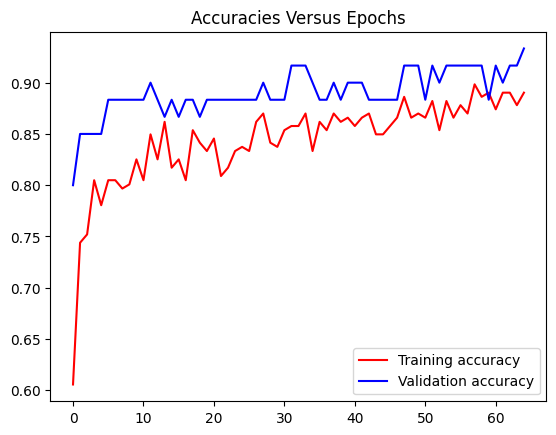

<Figure size 640x480 with 0 Axes>

In [ ]:
# making plot of training and validation accuracies against epochs to find the optimal amount and check for overfitting

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracies Versus Epochs')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
# save as JSON
json_string = NN_model.to_json()

NN_model.save_weights('Heart_Weights.h5')

In [ ]:
# save as keras model
NN_model.save('heart_model_saved')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/Heart_Weights.h5 /content/gdrive/My\ Drive

# Model 2: Logistic Regression


In [ ]:
#the optional test_indices parameter allows this functino to be called when we want randomly generated indices,
# and when we want a specific set.

def data_prep_logreg(df_X, df_Y, is_random_split, test_indices = None):
  if (is_random_split == True):
    import random
    # getting numbers from 0 to number of rows in data frame:
    inputNumbers = range(0,df_Y.shape[0]-1)

    # get list of random non repeating integers in this range, taking 20% of the numbers:
    testing_indices = random.choices(inputNumbers, k=int(0.2*len(inputNumbers)))

  else:
    testing_indices = test_indices

  # initialize empty training and testing data frames
  X_column_names = ['age','sex','cp_typical_ang', 'cp_atypical_ang','cp_non_ang','cp_asympt',
                              'trtbps','chol','fbs','restecg_norm','restecg_wave_abnorm','restecg_lv_hypertr','thalachh',
                              'exng','oldpeak','slp','caa','thall']
  Y_column_names = ['output']

  Y_train_logreg = pd.DataFrame(columns=Y_column_names)
  X_train_logreg = pd.DataFrame(columns=X_column_names)

  X_test_logreg = pd.DataFrame(columns=X_column_names)
  Y_test_logreg = pd.DataFrame(columns=Y_column_names)


  # seperate data into training and testing data frames using the randomly generated indices
  for i in range(df_Y.shape[0]):
    test_index = False
    for j in range(len(testing_indices)):
      if i == testing_indices[j]:
        test_index = True
        Y_test_logreg = pd.concat([Y_test_logreg, (df_Y.loc[i]).to_frame().T])
        X_test_logreg = pd.concat([X_test_logreg, (df_X.loc[i]).to_frame().T])  
        
    
    if test_index == False:
      X_train_logreg = pd.concat([X_train_logreg, (df_X.loc[i]).to_frame().T])
      Y_train_logreg = pd.concat([Y_train_logreg, (df_Y.loc[i]).to_frame().T])

  # adding column of ones to X_train and X_test
  train_length = X_train_logreg.shape[0]
  test_length = X_test_logreg.shape[0]

  a = np.ones((train_length,1))
  X_train_logreg = np.hstack((a, X_train_logreg))

  b = np.ones((test_length,1))
  X_test_logreg = np.hstack((b, X_test_logreg))


  X_train_logreg = np.asarray(X_train_logreg).astype(np.float32)
  Y_train_logreg = np.asarray(Y_train_logreg).astype(np.float32)

  X_test_logreg = np.asarray(X_test_logreg).astype(np.float32)
  Y_test_logreg = np.asarray(Y_test_logreg).astype(np.float32)

  Y_train_logreg = Y_train_logreg.reshape(Y_train_logreg.shape[0],)
  Y_test_logreg = Y_test_logreg.reshape(Y_test_logreg.shape[0],)

  return X_train_logreg, X_test_logreg, Y_train_logreg, Y_test_logreg




In [ ]:
%pip install scikit-learn
from sklearn.linear_model import LogisticRegression


#defining function to create and run a logistic regression model, and return the weights and accuracies
def make_logreg_model(df_X, df_Y, is_random_split, test_indices = None):
  if (is_random_split == True):
    X_train_logreg, X_test_logreg, Y_train_logreg, Y_test_logreg = data_prep_logreg(df_X, df_Y, True)

  else:
    X_train_logreg, X_test_logreg, Y_train_logreg, Y_test_logreg = data_prep_logreg(df_X, df_Y, False, test_indices)

  # make a logistic regression model and fit it onto our training data
  logreg_model = LogisticRegression(random_state=0, penalty=None, fit_intercept=False).fit(X_train_logreg, Y_train_logreg)

  # getting the w vector that the model found.
  w_logreg = logreg_model.coef_[0]

  validation_accuracy = logreg_model.score(X_test_logreg, Y_test_logreg)
  training_accuracy = logreg_model.score(X_train_logreg, Y_train_logreg)

  return w_logreg, training_accuracy, validation_accuracy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#using same testing/training split as the neural netork to compare performance

indices_for_test = [45, 14, 45, 80, 161, 84, 287, 186, 20, 36, 115, 297, 205, 125, 68, 19, 41, 162, 245, 91, 286, 290, 242, 166, 7, 57,
                    40, 212, 117, 156, 257, 146, 169, 108, 295, 227, 83, 116, 262, 257, 154, 26, 260, 189, 125, 270, 105, 144, 176, 33,
                    293, 253, 54, 213, 188, 55, 127, 148, 4, 190]

#calling earlier functions to create model and get the weight vector and validation accuracy
w_logreg_single, train_acc_logreg_single, val_acc_logreg_single = make_logreg_model(df_X,df_Y, False, indices_for_test)

print(w_logreg_single)
print(train_acc_logreg_single)
print(val_acc_logreg_single)

[ -2.7155565   -0.07284436  -0.76147009  -1.80534173  -0.74705823
   0.03393209   0.0340864   -0.207375    -0.32437415  -0.02649566
   3.72238795   4.08997024 -10.52791469   0.41931003  -0.42798475
  -0.57764413   0.37211964  -0.71986554  -0.42026301]
0.8414634146341463
0.8666666666666667


# Logistic Regression: Ensemble

In [ ]:
#initializing empty arrays of accuracies and weight vectors
w_logreg_ensemble = []
train_acc_logreg_ensemble = []
val_acc_logreg_ensemble = []

# creates and runs 40 logistic regression models on different, randomly generated
# training/testing splits. saves the information in the arrays.
for i in range(40):
  w_logreg, train_acc_logreg, val_acc_logreg = make_logreg_model(df_X,df_Y,True)
  w_logreg_ensemble.append(w_logreg)
  train_acc_logreg_ensemble.append(train_acc_logreg)
  val_acc_logreg_ensemble.append(val_acc_logreg)


In [ ]:

w0 = []
w1 = []
w2 = []
w3 = []
w4 = []
w5 = []
w6 = []
w7 = []
w8 = []
w9 = []
w10 = []
w11 = []
w12 = []
w13 = []
w14 = []
w15 = []
w16 = []
w17 = []
w18 = []

for i in range(len(w_logreg_ensemble)):
  for j in range(19):
    if (j==0):
      w0.append(w_logreg_ensemble[i][j])
    if (j==1):
      w1.append(w_logreg_ensemble[i][j])
    if (j==2):
      w2.append(w_logreg_ensemble[i][j])
    if (j==3):
      w3.append(w_logreg_ensemble[i][j])
    if (j==4):
      w4.append(w_logreg_ensemble[i][j])
    if (j==5):
      w5.append(w_logreg_ensemble[i][j])
    if (j==6):
      w6.append(w_logreg_ensemble[i][j])
    if (j==7):
      w7.append(w_logreg_ensemble[i][j])
    if (j==8):
      w8.append(w_logreg_ensemble[i][j])
    if (j==9):
      w9.append(w_logreg_ensemble[i][j])
    if (j==10):
      w10.append(w_logreg_ensemble[i][j])
    if (j==11):
      w11.append(w_logreg_ensemble[i][j])
    if (j==12):
      w12.append(w_logreg_ensemble[i][j])
    if (j==13):
      w13.append(w_logreg_ensemble[i][j])
    if (j==14):
      w14.append(w_logreg_ensemble[i][j])
    if (j==15):
      w15.append(w_logreg_ensemble[i][j])
    if (j==16):
      w16.append(w_logreg_ensemble[i][j])
    if (j==17):
      w17.append(w_logreg_ensemble[i][j])
    if (j==18):
      w18.append(w_logreg_ensemble[i][j])


#creating data frame with accuracies and weights information
df_logreg_ensemble = pd.DataFrame(columns=['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9','w10','w11','w12',
                                           'w13','w14','w15','w16','w17','w18','train_accuracy','val_accuracy'])

df_logreg_ensemble['w0']=pd.Series(w0)
df_logreg_ensemble['w1']=pd.Series(w1)
df_logreg_ensemble['w2']=pd.Series(w2)
df_logreg_ensemble['w3']=pd.Series(w3)
df_logreg_ensemble['w4']=pd.Series(w4)
df_logreg_ensemble['w5']=pd.Series(w5)
df_logreg_ensemble['w6']=pd.Series(w6)
df_logreg_ensemble['w7']=pd.Series(w7)
df_logreg_ensemble['w8']=pd.Series(w8)
df_logreg_ensemble['w9']=pd.Series(w9)
df_logreg_ensemble['w10']=pd.Series(w10)
df_logreg_ensemble['w11']=pd.Series(w11)
df_logreg_ensemble['w12']=pd.Series(w12)
df_logreg_ensemble['w13']=pd.Series(w13)
df_logreg_ensemble['w14']=pd.Series(w14)
df_logreg_ensemble['w15']=pd.Series(w15)
df_logreg_ensemble['w16']=pd.Series(w16)
df_logreg_ensemble['w17']=pd.Series(w17)
df_logreg_ensemble['w18']=pd.Series(w18)
df_logreg_ensemble['train_accuracy']=pd.Series(train_acc_logreg_ensemble)
df_logreg_ensemble['val_accuracy']=pd.Series(val_acc_logreg_ensemble)

df_logreg_ensemble.head()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w11,w12,w13,w14,w15,w16,w17,w18,train_accuracy,val_accuracy
0,0.020807,0.045030,-0.870249,-0.999408,-0.038218,0.974026,0.312221,-0.307209,-0.296066,-0.193324,...,0.508853,-0.509042,0.592138,-0.485344,-0.548649,0.274260,-0.817637,-0.597264,0.842742,0.850000
1,0.260974,-0.154870,-0.641573,-1.151708,0.246880,1.054982,0.343061,-0.261437,-0.350012,-0.056603,...,0.217637,0.292529,0.259082,-0.324557,-0.660973,0.527058,-0.857044,-0.511524,0.834008,0.900000
2,0.110829,0.015656,-0.763118,-1.142919,0.139561,1.037589,0.257027,-0.236648,-0.114762,0.142540,...,0.490397,-0.434446,0.459012,-0.301473,-0.481422,0.424844,-0.921216,-0.512429,0.844000,0.800000
3,0.035497,-0.031989,-0.856314,-1.040092,-0.008830,1.011692,0.263984,-0.321555,-0.297694,-0.078401,...,0.339377,-0.366162,0.582982,-0.429572,-0.375340,0.526420,-0.891864,-0.577922,0.846774,0.883333
4,0.123377,-0.082170,-0.776389,-1.059450,0.182539,0.927370,0.239563,-0.340783,-0.158028,0.109378,...,0.418252,-0.202331,0.526374,-0.277656,-0.492821,0.369644,-0.737720,-0.653413,0.856000,0.850000


In [ ]:
print(df_logreg_ensemble.mean())

w0               -0.425950
w1               -0.043413
w2               -0.796575
w3               -1.242850
w4               -0.061685
w5                0.842267
w6                0.258778
w7               -0.352818
w8               -0.244169
w9                0.031217
w10               0.629667
w11               1.226894
w12              -2.282510
w13               0.474424
w14              -0.425021
w15              -0.602037
w16               0.391939
w17              -0.817760
w18              -0.567735
train_accuracy    0.849715
val_accuracy      0.820833
dtype: float64


# `Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
indices_test = [45, 14, 45, 80, 161, 84, 287, 186, 20, 36, 115, 297, 205, 125, 68, 19, 41, 162, 245, 91, 286, 290, 242, 166, 7, 57,
                    40, 212, 117, 156, 257, 146, 169, 108, 295, 227, 83, 116, 262, 257, 154, 26, 260, 189, 125, 270, 105, 144, 176, 33,
                    293, 253, 54, 213, 188, 55, 127, 148, 4, 190]

X_train_dtm, X_test_dtm, Y_train_dtm, Y_test_dtm = data_prep_logreg(df_X,df_Y,False,indices_test)


tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train_dtm,Y_train_dtm)

Y_test_pred = tree_model.predict(X_test_dtm)
Y_train_pred = tree_model.predict(X_train_dtm)

print("training accuracy of decision tree model: ", metrics.accuracy_score(Y_train_dtm, Y_train_pred))
print("accuracy of decision tree model: ",metrics.accuracy_score(Y_test_dtm, Y_test_pred))


training accuracy of decision tree model:  1.0
accuracy of decision tree model:  0.7833333333333333
